In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])



In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1), data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])


In [9]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.


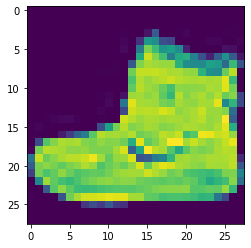

label: Ankle boot


In [15]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [16]:
# Fit the model

history=model.fit(train_images[...,np.newaxis], train_labels, epochs=6, batch_size=256, verbose=2)


Epoch 1/6
235/235 - 11s - loss: 0.5679 - sparse_categorical_accuracy: 0.7997 - mean_absolute_error: 4.4200 - 11s/epoch - 46ms/step
Epoch 2/6
235/235 - 10s - loss: 0.3727 - sparse_categorical_accuracy: 0.8688 - mean_absolute_error: 4.4200 - 10s/epoch - 42ms/step
Epoch 3/6
235/235 - 10s - loss: 0.3410 - sparse_categorical_accuracy: 0.8785 - mean_absolute_error: 4.4200 - 10s/epoch - 42ms/step
Epoch 4/6
235/235 - 10s - loss: 0.3225 - sparse_categorical_accuracy: 0.8850 - mean_absolute_error: 4.4200 - 10s/epoch - 42ms/step
Epoch 5/6
235/235 - 10s - loss: 0.3073 - sparse_categorical_accuracy: 0.8896 - mean_absolute_error: 4.4200 - 10s/epoch - 42ms/step
Epoch 6/6
235/235 - 10s - loss: 0.2966 - sparse_categorical_accuracy: 0.8946 - mean_absolute_error: 4.4200 - 10s/epoch - 42ms/step


#### Plot training history

In [17]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.567935,0.799700,4.420000
1,0.372674,0.868767,4.420000
2,0.340959,0.878500,4.420001
3,0.322489,0.885050,4.420001
4,0.307298,0.889650,4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

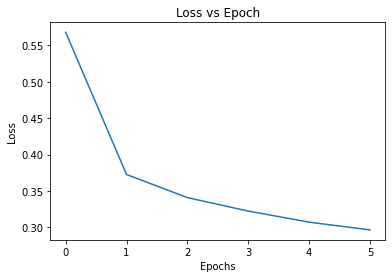

In [18]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epoch", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


[Text(0, 0.5, 'Acc'), Text(0.5, 0, 'Epochs')]

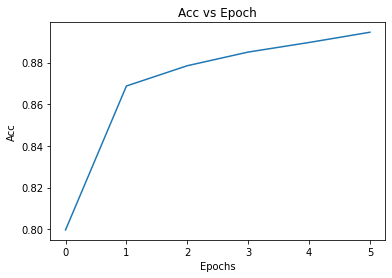

In [19]:
# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy", title="Acc vs Epoch", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Acc")

In [20]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [23]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3163 - sparse_categorical_accuracy: 0.8901 - mean_absolute_error: 4.4200 - 1s/epoch - 4ms/step


#### Make predictions from the model

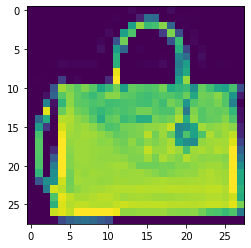

Label: Bag


In [26]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [29]:
 # Get the model predictions
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])

print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: Bag
